In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas import set_option
%config IPCompleter.greedy=True 
%matplotlib inline 

In [5]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [6]:
filepath=os.path.abspath('D:\DataSets\Build-DataSet\S50F15M_LS\Label&Feature 3Q20To1Q21\Long_Label_3q20-1q21\MLTrain-Long_S50M15_3Q20To1Q21.csv')

chunksize_val=1000
chunkDFList=[]
for df_chunk in pd.read_csv(filepath,index_col='datetime',parse_dates=['datetime'],dayfirst=True,chunksize=chunksize_val):
  df_chunk.drop(columns= ['open','high','low','close'],inplace=True)
  chunkDFList.append(df_chunk)

df_feature=pd.concat(chunkDFList,axis=0)
df_feature.info()

NameError: name 'os' is not defined

In [16]:
number_features=[   col for col in df_feature.columns  if col.startswith('indy_') ]
print(number_features)
df_numFeat=df_feature[number_features]

category_features=[   col for col in df_feature.columns  if col.startswith('cate_') ]
print(category_features)
df_cateFeat=df_feature[category_features]

display('df_numFeat.tail(3)','df_cateFeat.tail(3)')

['indy_ma-110', 'indy_ma-440', 'indy_ma-550', 'indy_ema-600', 'indy_ma-1100', 'indy_hh-550', 'indy_ll-550', 'indy_mid-550', 'indy_hh2-1100', 'indy_ll2-1100', 'indy_mid2-1100', 'indy_macd110-440', 'indy_signal110-440-110', 'indy_hist_macd110-440', 'indy_rsi25-ma20', 'indy_6ATRTrail-110', 'indy_6ATRTrail_DC-110']
['cate_3trend-550', 'cate_2trend-1100', 'cate_rannkHL1100-MA66', 'cate_MACDTrend', 'cate_RsiTrend', 'cate_CombineTrend']


df_numFeat.tail(3)
                     indy_ma-110  indy_ma-440  indy_ma-550  indy_ema-600  \
datetime                                                                   
2020-02-26 16:15:00       974.17      1008.06      1015.36       1014.36   
2020-02-26 16:30:00       973.32      1007.84      1015.09       1014.04   
2020-02-26 16:45:00       972.49      1007.63      1014.84       1013.73   

                     indy_ma-1100  indy_hh-550  indy_ll-550  indy_mid-550  \
datetime                                                                    
2020-02-26 16:15:00       1041.31       1064.5        916.5        990.50   
2020-02-26 16:30:00       1041.18       1064.5        916.5        990.50   
2020-02-26 16:45:00       1041.05       1063.9        913.0        988.45   

                     indy_hh2-1100  indy_ll2-1100  indy_mid2-1100  \
datetime                                                            
2020-02-26 16:15:00         1081.7          916.5          999.10   
2020-02-26 16:30:00         1081.7          916.5          999.10   
2020-02-26 16:45:00         1081.7          913.0          997.35   

                     indy_macd110-440  indy_signal110-440-110  \
datetime                                                        
2020-02-26 16:15:00            -33.90                  -16.20   
2020-02-26 16:30:00            -34.53                  -16.45   
2020-02-26 16:45:00            -35.14                  -16.71   

                     indy_hist_macd110-440  indy_rsi25-ma20  \
datetime                                                      
2020-02-26 16:15:00                 -17.70            31.80   
2020-02-26 16:30:00                 -18.07            31.26   
2020-02-26 16:45:00                 -18.43            30.73   

                     indy_6ATRTrail-110  indy_6ATRTrail_DC-110  
datetime                                                        
2020-02-26 16:15:00              937.58                 990.32  
2020-02-26 16:30:00              936.82                 990.20  
2020-02-26 16:45:00              936.82                 990.19  

df_cateFeat.tail(3)
                     cate_3trend-550  cate_2trend-1100  cate_rannkHL1100-MA66  \
datetime                                                                        
2020-02-26 16:15:00                1                 0                      3   
2020-02-26 16:30:00                1                 0                      3   
2020-02-26 16:45:00                1                 0                      3   

                     cate_MACDTrend  cate_RsiTrend  cate_CombineTrend  
datetime                                                               
2020-02-26 16:15:00               1              1                  1  
2020-02-26 16:30:00               1              1                  1  
2020-02-26 16:45:00               1              1                  1

In [17]:
set_option('display.width', 100)

In [18]:
df_numFeat.describe()

,indy_ma-110,indy_ma-440,indy_ma-550,indy_ema-600,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail-110,indy_6ATRTrail_DC-110
count,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000,33272.000000
mean,1013.670223,1013.202334,1013.048650,1012.973425,1012.260848,1043.215749,974.445538,1008.830647,1054.608644,956.804179,1005.706417,0.467890,0.476184,-0.008305,50.736566,1012.569574,1013.898525
std,93.871418,93.147925,92.906177,91.949938,91.536379,92.496407,98.493950,94.182862,89.864803,101.489695,93.551696,16.306936,15.687629,7.201175,9.289765,94.404150,93.759533
min,759.910000,773.800000,779.060000,788.860000,796.140000,814.000000,744.200000,779.100000,839.300000,744.200000,791.750000,-58.530000,-52.930000,-34.040000,19.990000,746.000000,757.850000
25%,945.727500,943.487500,942.515000,942.000000,940.367500,968.000000,898.000000,937.487500,988.900000,874.200000,933.850000,-8.760000,-8.700000,-4.620000,44.140000,944.840000,944.650000
50%,1013.305000,1014.940000,1014.085000,1015.175000,1018.765000,1048.000000,986.200000,1013.650000,1062.000000,980.500000,1004.500000,1.550000,1.670000,-0.370000,50.640000,1013.620000,1012.905000
75%,1084.950000,1086.840000,1087.402500,1086.210000,1088.425000,1114.300000,1057.000000,1087.000000,1117.300000,1045.100000,1088.550000,11.150000,11.030000,4.480000,57.360000,1083.240000,1085.512500
max,1197.290000,1187.890000,1185.590000,1182.390000,1179.340000,1221.900000,1162.700000,1192.300000,1221.900000,1134.000000,1177.950000,49.340000,45.960000,25.650000,81.910000,1218.720000,1209.090000


In [20]:
corr_numFeatures=df_numFeat.corr()
corr_numFeatures

,indy_ma-110,indy_ma-440,indy_ma-550,indy_ema-600,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail-110,indy_6ATRTrail_DC-110
indy_ma-110,1.000000,0.984824,0.978672,0.984364,0.949104,0.969713,0.966219,0.981397,0.933542,0.935613,0.955876,0.131057,0.155987,-0.043046,-0.036016,0.996469,0.998487
indy_ma-440,0.984824,1.000000,0.998658,0.998035,0.977182,0.987777,0.972423,0.993512,0.956884,0.950545,0.975187,-0.042991,-0.000254,-0.096805,-0.066603,0.977061,0.984908
indy_ma-550,0.978672,0.998658,1.000000,0.998463,0.984105,0.990622,0.971099,0.994217,0.963188,0.953803,0.979981,-0.070738,-0.037304,-0.078924,-0.069412,0.970542,0.978871
indy_ema-600,0.984364,0.998035,0.998463,1.000000,0.986658,0.991102,0.970800,0.994296,0.968387,0.956331,0.983850,-0.034417,-0.002176,-0.073203,-0.063162,0.976961,0.984342
indy_ma-1100,0.949104,0.977182,0.984105,0.986658,1.000000,0.983327,0.945875,0.977446,0.983397,0.954797,0.990227,-0.118274,-0.105722,-0.037521,-0.069324,0.940330,0.949589
indy_hh-550,0.969713,0.987777,0.990622,0.991102,0.983327,1.000000,0.945355,0.985360,0.980482,0.931815,0.976361,-0.060162,-0.039961,-0.049188,-0.059101,0.962545,0.970821
indy_ll-550,0.966219,0.972423,0.971099,0.970800,0.945875,0.945355,1.000000,0.987100,0.907675,0.973134,0.963805,0.007427,0.033815,-0.056852,-0.042755,0.963024,0.966050
indy_mid-550,0.981397,0.993512,0.994217,0.994296,0.977446,0.985360,0.987100,1.000000,0.956074,0.966404,0.983400,-0.025659,-0.001941,-0.053881,-0.051377,0.976208,0.981854
indy_hh2-1100,0.933542,0.956884,0.963188,0.968387,0.983397,0.980482,0.907675,0.956074,1.000000,0.911798,0.974878,-0.091914,-0.082588,-0.028225,-0.064060,0.925078,0.934824
indy_ll2-1100,0.935613,0.950545,0.953803,0.956331,0.954797,0.931815,0.973134,0.966404,0.911798,1.000000,0.980358,-0.043780,-0.031992,-0.029450,-0.040805,0.930368,0.936191


#  Correlation Matrix Plot

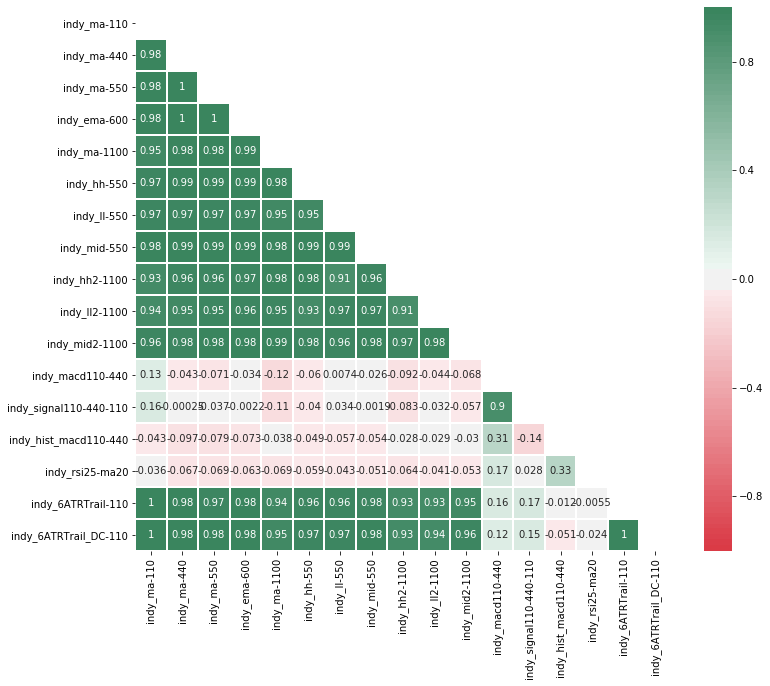

In [22]:

mask = np.zeros_like(corr_numFeatures)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr_numFeatures, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

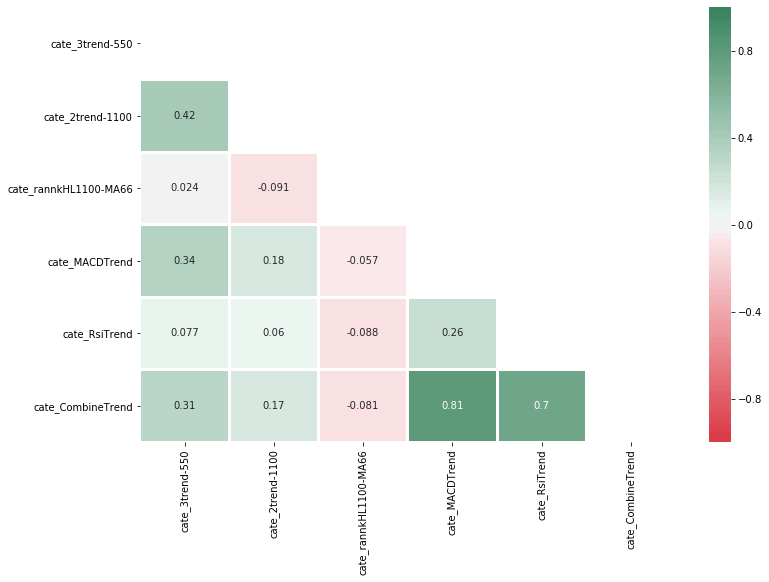

In [24]:
corr_cateFeatures=df_cateFeat.corr()
corr_cateFeatures
mask = np.zeros_like(corr_cateFeatures)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr_cateFeatures, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=2, annot=True, mask=mask, ax=ax);